In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fusemachines Heart Disease/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape


(918, 12)

In [ ]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
df['FastingBS']

0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64

In [ ]:
# convert FastingBS to object data type
df['FastingBS'] = df['FastingBS'].astype(object)

In [ ]:
# Categorical Features
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

print('Categorical features: ',cat_features)


Categorical features:  ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
# Numerical Features
num_features=[i for i in df.columns if df.dtypes[i] in ['int64','float']]
num_features=num_features[:-1]
num_features

print('Numerical features: ',num_features)

Numerical features:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [ ]:
# df['HeartDisease'] = df['HeartDisease'].astype('category')
# df['FastingBS'] = df['FastingBS'].astype('category')
# df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [ ]:
# Target Variable
df.loc[:,'HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

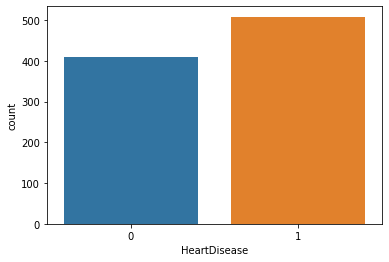

In [ ]:
# Frequency of target variables
sns.countplot(x='HeartDisease',data=df)

In [ ]:
#Corelation 
corrMatrix = df.corr()
print (corrMatrix)

                   Age  RestingBP  Cholesterol     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  0.235792  0.050148   
MaxHR        -0.382045  -0.112135     0.235792  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


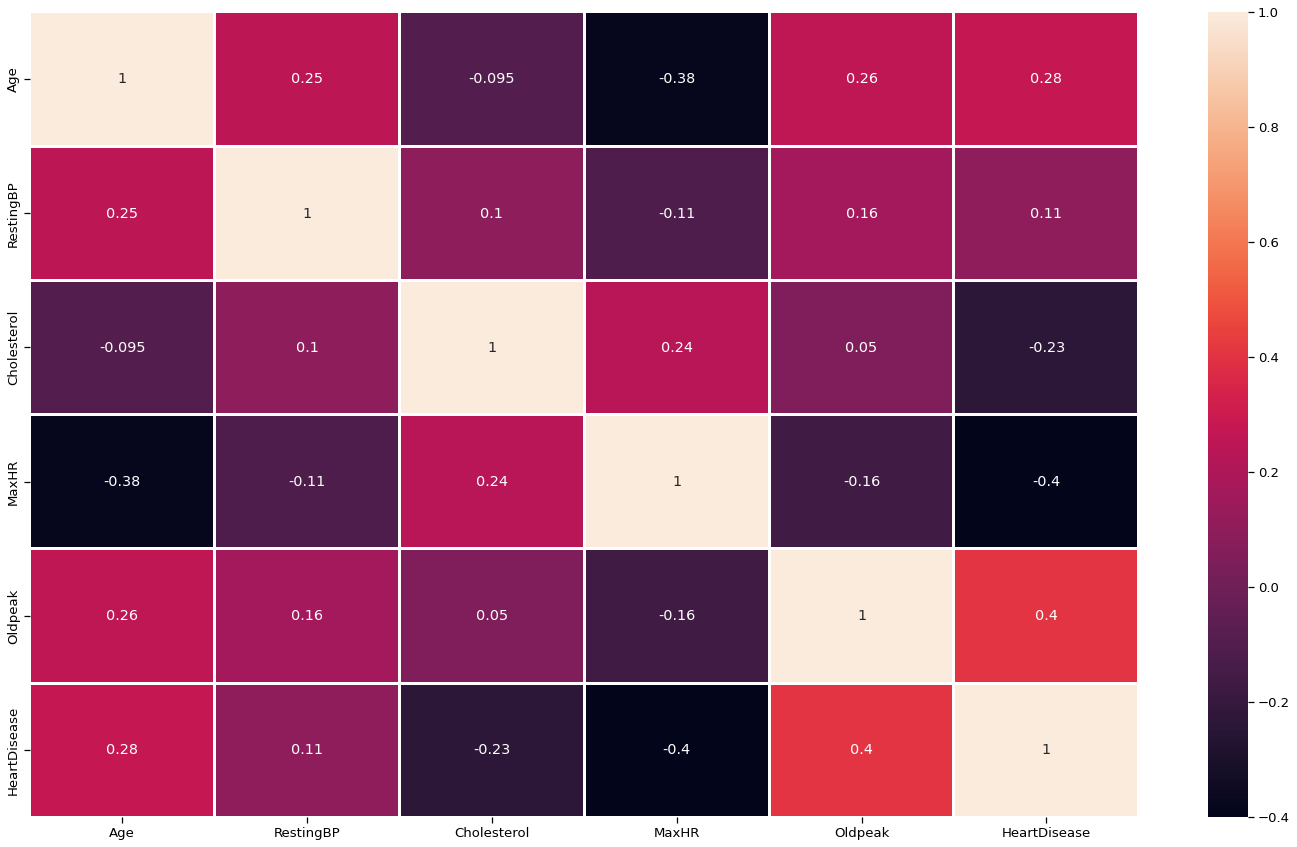

In [ ]:
# Corelation with features
plt.figure(figsize=(20,12))
# sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

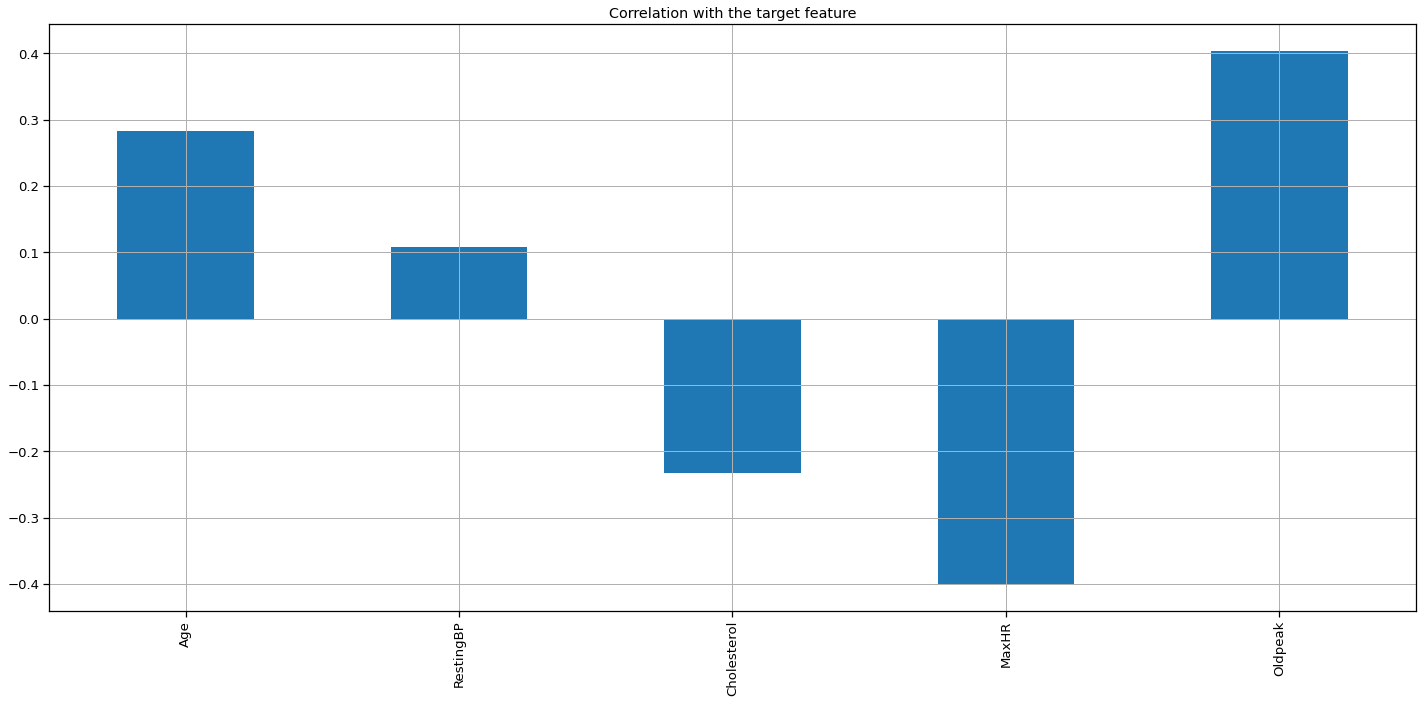

In [ ]:
# corealation with target variable
# sns.set_context('notebook',font_scale = 1.2)
df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [ ]:
# Exploring numerical features
# Examining skewness

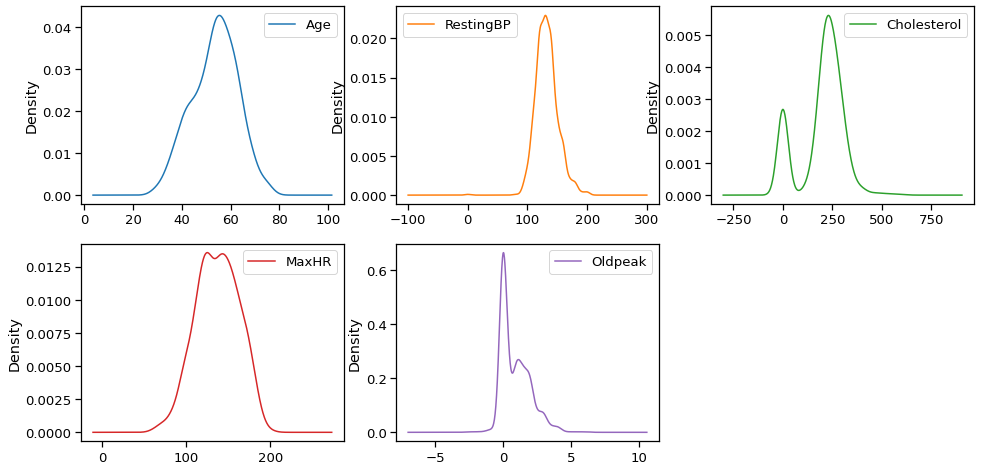

In [ ]:
df[num_features].plot(kind="density",subplots=True, layout=(2,3), sharex=False,figsize=(16,8))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4056c34ad0>,
      dtype=object)

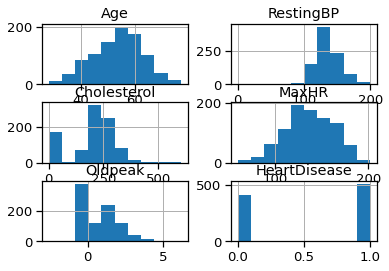

In [ ]:
df.hist()

In [ ]:
# Cleaning data
# from the df.describe we can see some 0 values in RestingBP,Cholesterol
# assuming someone doesn't have 0 resting blood pressure or 0 cholesterol, we clean it

In [ ]:
df[df['RestingBP']==0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
df[df['Cholesterol']==0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
# changing 0 to nan so a KNNimputer takes charges of missing data 

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['Cholesterol']=df['Cholesterol'].replace(0,np.nan)
df['RestingBP']=df['RestingBP'].replace(0,np.nan)

df[['Cholesterol','RestingBP']]=imputer.fit_transform(df[['Cholesterol','RestingBP']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


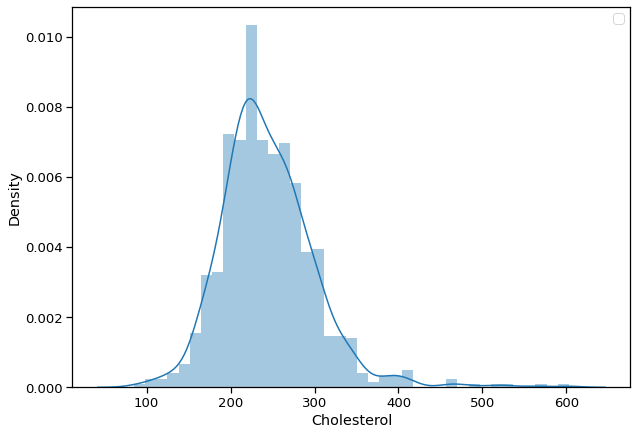

In [ ]:
fig=plt.figure(2,figsize=(10,7))
sns.distplot(df['Cholesterol'])
plt.legend()

In [ ]:
# Categorical Features

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1


In [ ]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

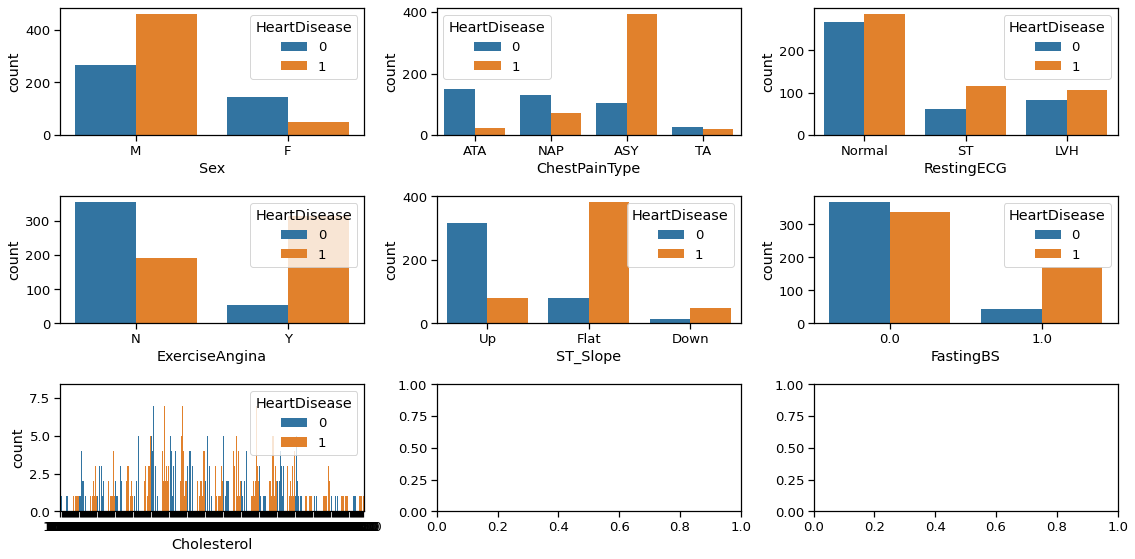

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(16, 8))

sns.countplot(x='Sex',hue="HeartDisease", data=df,ax=ax[0,0])
sns.countplot(x='ChestPainType', hue="HeartDisease", data=df,ax=ax[0,1])
sns.countplot(x='RestingECG', hue="HeartDisease", data=df,ax=ax[0,2])

sns.countplot(x='ExerciseAngina', hue="HeartDisease", data=df,ax=ax[1,0])
sns.countplot(x='ST_Slope', hue="HeartDisease", data=df,ax=ax[1,1])
sns.countplot(x='FastingBS', hue="HeartDisease", data=df,ax=ax[1,2])
sns.countplot(x='Cholesterol', hue="HeartDisease", data=df,ax=ax[2,0])

fig.tight_layout()

In [ ]:
# Multiclass features

In [ ]:
def distribution_categorical_features(data, feature, target) :
    sns.set(rc={'figure.figsize':(14,8.27)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

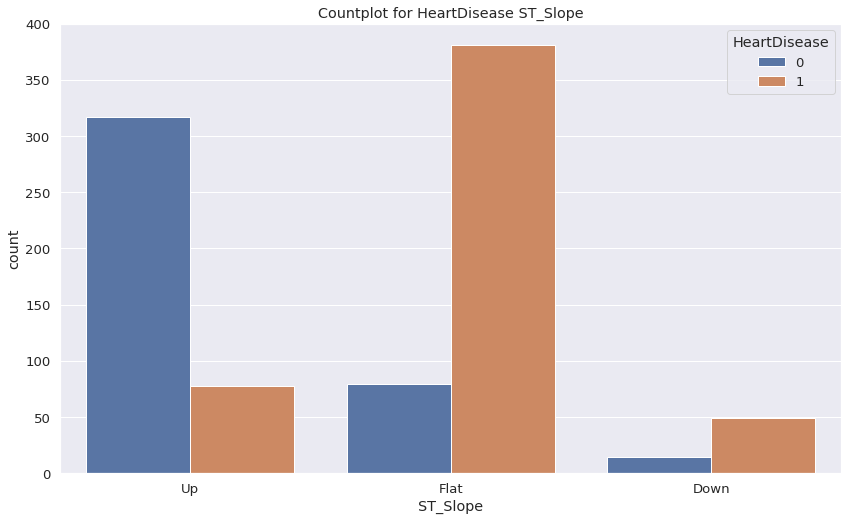

In [ ]:
distribution_categorical_features(df, "ST_Slope", "HeartDisease")

In [ ]:
# most heart disease patient has st_slope as flat

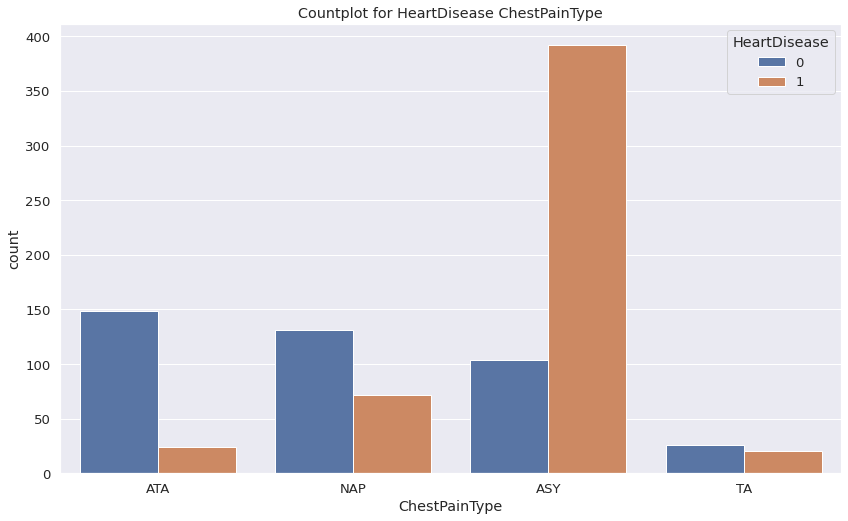

In [ ]:
distribution_categorical_features(df, "ChestPainType", "HeartDisease")

In [ ]:
# Most Heart Disease Patients have Chest Pain with an Asymptomatic (ASY) type.

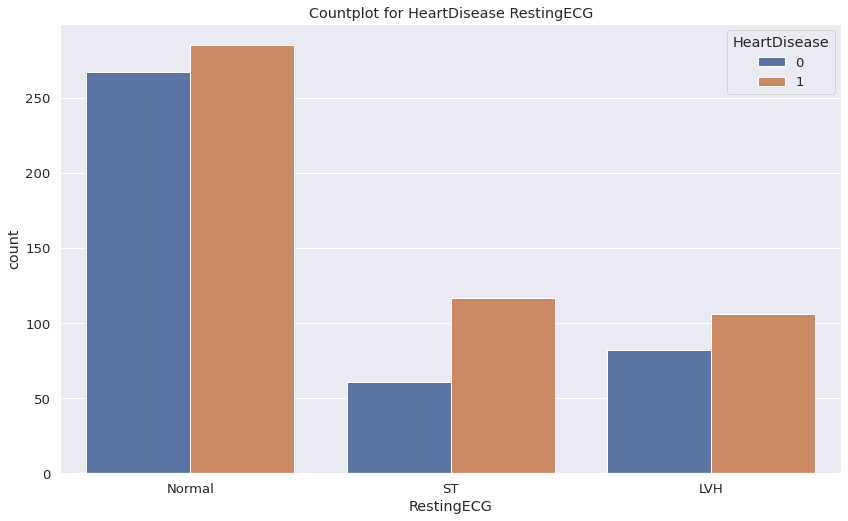

In [ ]:
distribution_categorical_features(df, "RestingECG", "HeartDisease")

In [ ]:
# it is not a criterion for detecting heart disease because it's a bit balanced between no heart disease and the one with heart disease

In [ ]:
# Numerical features

In [ ]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df[target]==1][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
    sns.kdeplot(df[df[target]==0][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

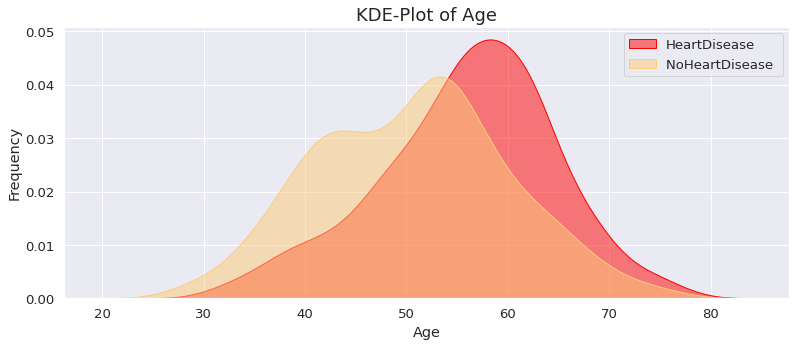

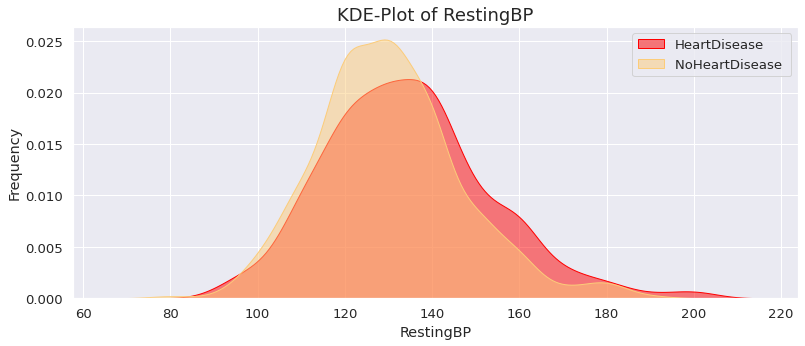

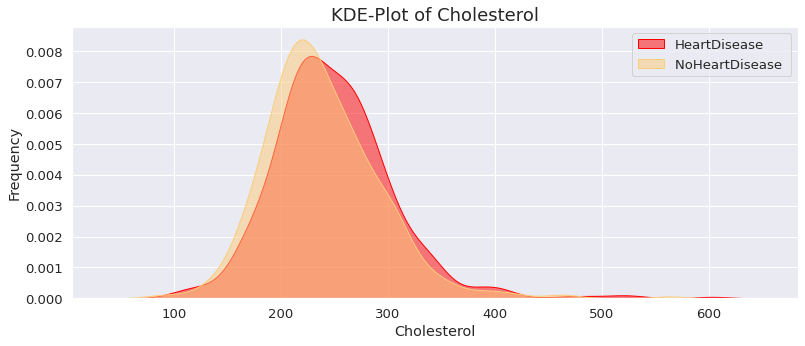

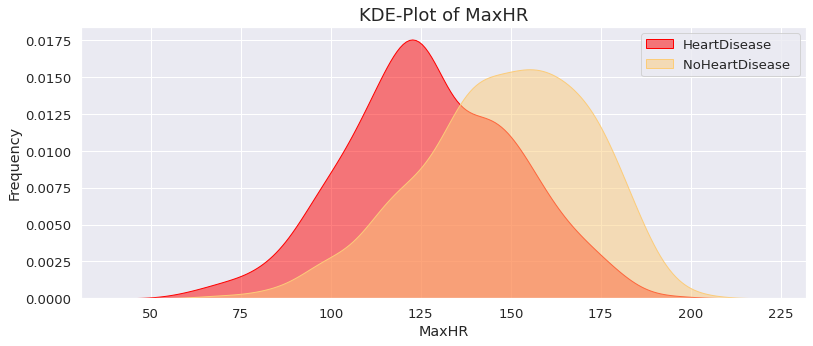

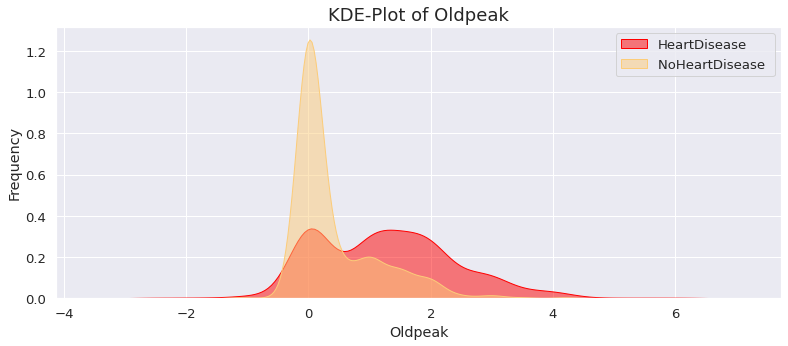

In [ ]:
for column in num_features : 
    kde_numerical_features(column, 'HeartDisease')

In [ ]:
# Age
# Most of heart disease Patients have age between 55 and 65

# Resting BP
# Most tested Patients have RestingBP between 120 and 150

# Cholesterol
# Average Cholesterol is 198.7, Most tested Patients have Cholesterol above 200

# Max HR
# Most of tested patients with heart disease have around 120 maxHR

# Old peak
# Most patients with 0 oldpeak, don't have Heart disease

In [ ]:
from matplotlib.gridspec import GridSpec
def distribution_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0)

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1)

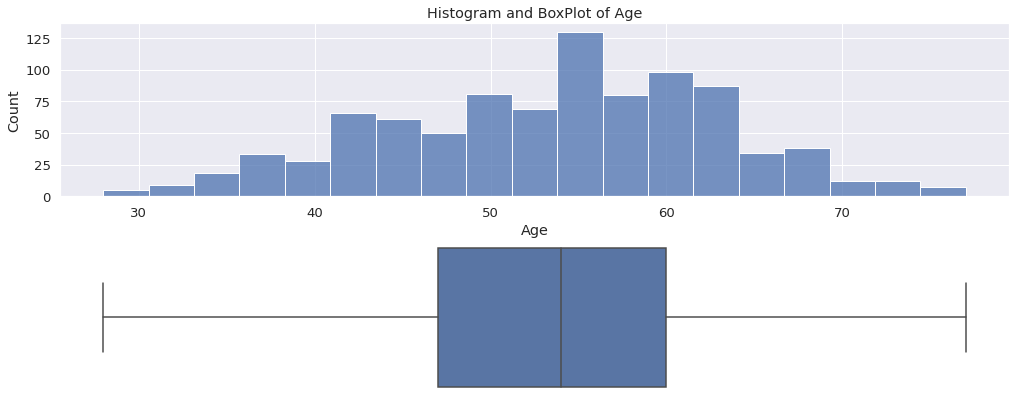

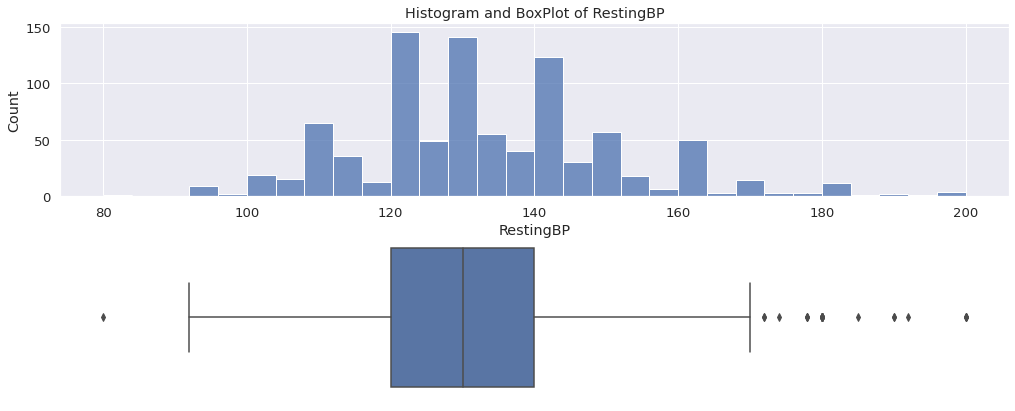

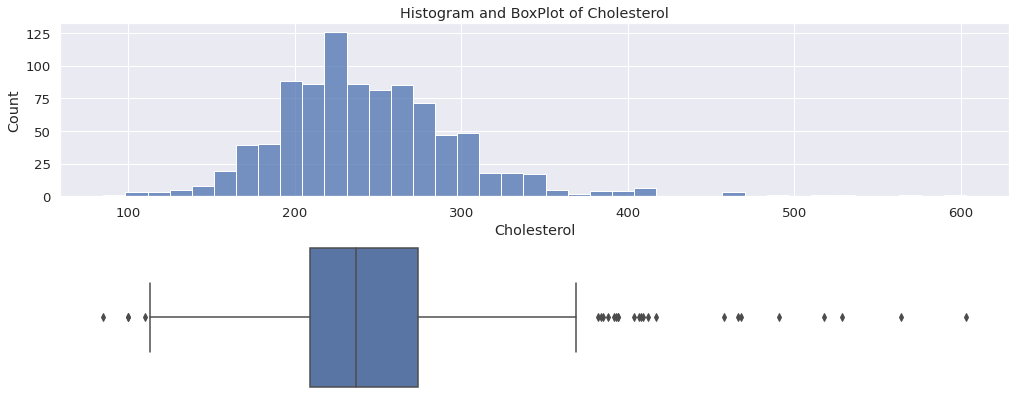

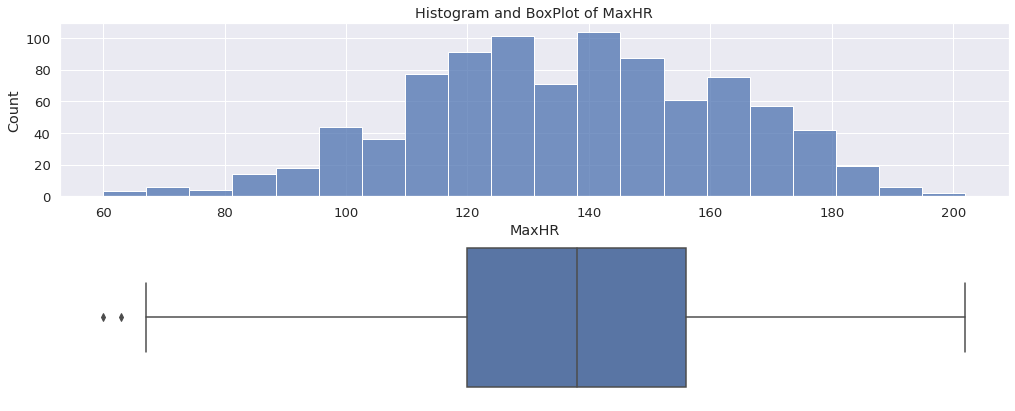

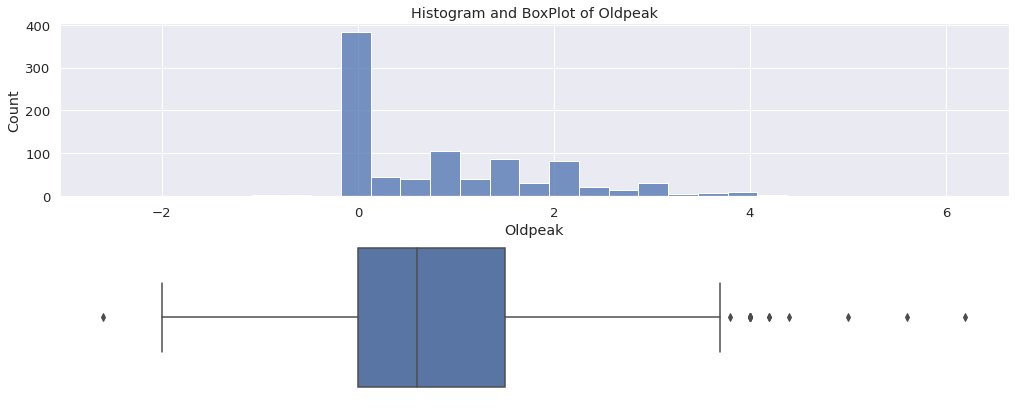

In [ ]:
for col in num_features:
    distribution_plot(df[col], col)

In [ ]:
# Removing Outliers


In [ ]:
# One hot encoding
final_df = pd.get_dummies(df, columns=cat_features)
final_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0.0,FastingBS_1.0,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,172.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49.0,160.0,180.0,156.0,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,98.0,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,108.0,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,122.0,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110.0,264.0,132.0,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68.0,144.0,193.0,141.0,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
915,57.0,130.0,131.0,115.0,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
916,57.0,130.0,236.0,174.0,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


In [ ]:
#Splitting the dataset

X = final_df.drop(columns=["HeartDisease"], axis=1)
y = final_df['HeartDisease']

In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)

In [ ]:
X_scaled

array([[-1.4331398 ,  0.41479395,  0.79224215, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.52713121, -1.14463151, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.75135854, -0.14137467,  0.68562525, ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.14137467, -2.01533619, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.14137467, -0.14954046, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30356023, -1.23347893, ..., -0.27144836,
        -1.00218103,  1.15067399]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

In [ ]:
# Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)

In [ ]:
import joblib
joblib.dump(logreg,r'C:\Users\Epoch\OneDrive\Desktop\heart-disease-deployement\models\lg.sav')

['C:\\Users\\Epoch\\OneDrive\\Desktop\\heart-disease-deployement\\models\\lg.sav']

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        98
           1       0.90      0.84      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230



In [ ]:
print(accuracy_score(y_val, y_pred))

0.8565217391304348


Text(0.5, 527.9871999999999, 'Predicted label')

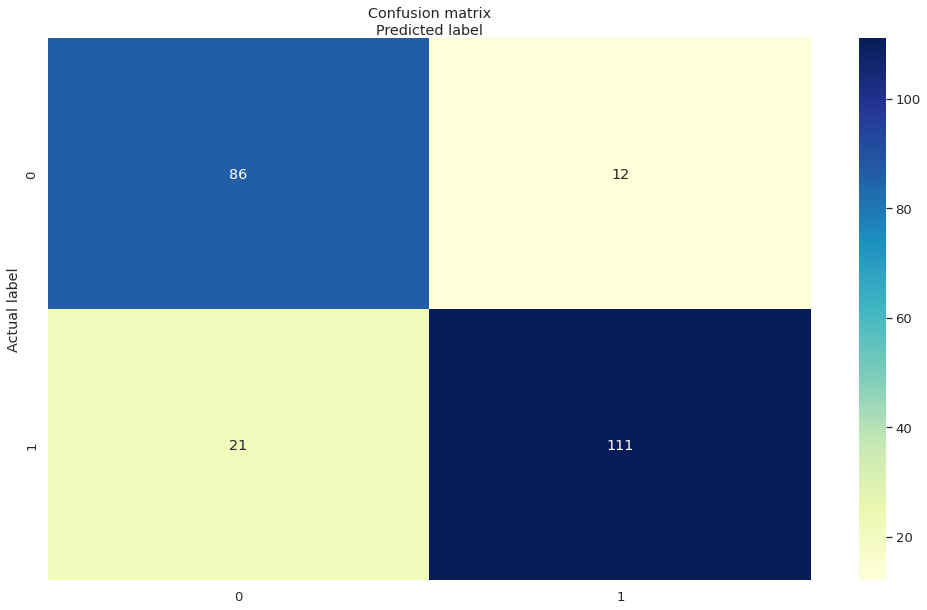

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



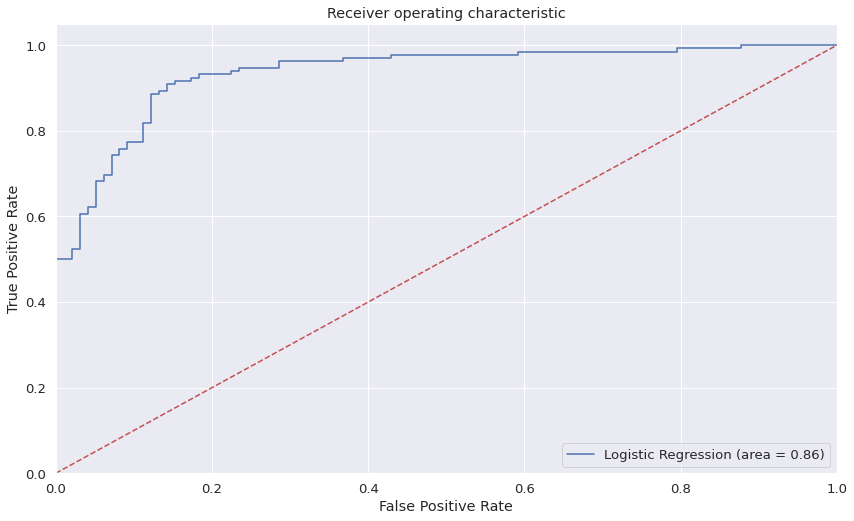

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
rf1 =RandomForestClassifier()

rf1.fit(X_train, y_train)
preds=rf1.predict(X_test)

In [ ]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        98
           1       0.92      0.86      0.89       132

    accuracy                           0.88       230
   macro avg       0.87      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



Text(0.5, 527.9871999999999, 'Predicted label')

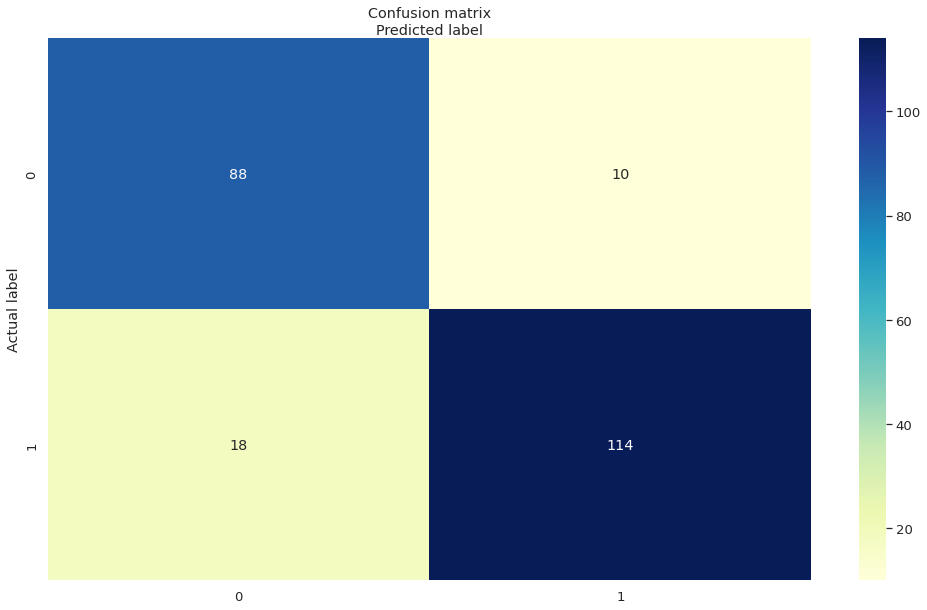

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_val, preds)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



# Model Building

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/Fusemachines Heart Disease/heart.csv')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
cat_attribs = heart_df.select_dtypes(['object']).columns.to_list()
num_attribs = [col for col in heart_df.columns.to_list() if col not in cat_attribs]
to_impute_attribs = ["Cholesterol", "Oldpeak"]
for _ in to_impute_attribs:
  num_attribs.remove(_)
num_attribs = to_impute_attribs + num_attribs

num_attribs.remove("HeartDisease")

num_attribs.remove('FastingBS')
cat_attribs.append('FastingBS')

## Special Attributes
cat_attribs = cat_attribs + ['Zero_Cholesterol', 'Zero_RestingBP']


print("Categorical: ", cat_attribs)
print("Numberical: ", num_attribs)

Categorical:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'Zero_Cholesterol', 'Zero_RestingBP']
Numberical:  ['Cholesterol', 'Oldpeak', 'Age', 'RestingBP', 'MaxHR']


## Defining Data Transformation

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class Zero_to_NAN_Converter(BaseEstimator, TransformerMixin):
    def __init__(self, cols=-1):
      self.cols = cols
    
    def fit(self, X, y=None):
      return self
    
    def transform(self, X, y=None):
      good_data = X[:, self.cols+1:]
      for i in range(self.cols, -1, -1):
        good_data = np.c_[np.where(X[:, i] == 0, np.nan, X[:, i]), good_data]
        print(good_data.shape)
      return good_data


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer


num_pipeline = Pipeline([
  ('knn_imputer', KNNImputer(n_neighbors=4)),
  ('std_scaler', RobustScaler()),
])

cat_pipeline = Pipeline([
  ("one_hot", OneHotEncoder(sparse=False))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

## Spiliting the data and applying Transformations

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(heart_df.drop('HeartDisease', axis=1), heart_df['HeartDisease'], test_size=0.25, random_state=42)

X_train['Zero_Cholesterol'] = X_train['Cholesterol'] == 0
X_train['Zero_RestingBP'] = X_train['RestingBP'] == 0
X_test['Zero_Cholesterol'] = X_test['Cholesterol'] == 0
X_test['Zero_RestingBP'] = X_test['RestingBP'] == 0

X_train['Cholesterol']=X_train['Cholesterol'].replace(0,np.nan)
X_train['RestingBP']=X_train['RestingBP'].replace(0,np.nan)
X_test['Cholesterol']=X_test['Cholesterol'].replace(0,np.nan)
X_test['RestingBP']=X_test['RestingBP'].replace(0,np.nan)


X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


linear_clf = LogisticRegression(C=0.1, solver='liblinear')
forest_clf = RandomForestClassifier(random_state=42, criterion='entropy', max_features=6, n_estimators=200)
neighbour_clf = KNeighborsClassifier()
gb_clf = GradientBoostingClassifier(loss='exponential', subsample=0.6, n_estimators=50)
lgbm_clf = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
cat_clf = CatBoostClassifier()
svc_clf = SVC(gamma="auto", C=1, degree=3, kernel='linear', probability=True)

voting_clf = VotingClassifier(
estimators=[('lr', linear_clf), ('rf', forest_clf),
            ('svc', svc_clf), ('knn', neighbour_clf), 
            ('gb', gb_clf)],
    voting='soft')
models = [
          ("Logistic", linear_clf),
          ("Forest", forest_clf),
          ("KN", neighbour_clf),
          ("GB", gb_clf),
          ("LGBM" , lgbm_clf),
          # ("Cat", CatBoostClassifier()),
          ("SVC", svc_clf),
          ("Soft", voting_clf),
]
cv = 10


def score_models(models, X_train, y_train, cv=10):
  scores = []
  for model_name, model in models:
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"{model_name}: {np.median(score)}")
    scores.append((model_name, score))
  return scores

scores = score_models(models, X_train, y_train)

Logistic: 0.8539002557544757
Forest: 0.8833120204603581
KN: 0.8478260869565217
GB: 0.8478260869565217
LGBM: 0.8405797101449275
SVC: 0.8758525149190111
Soft: 0.8757459505541347


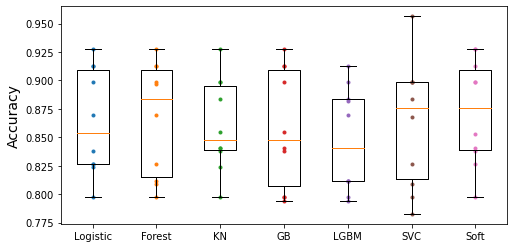

In [ ]:
import matplotlib.pyplot as plt

def plot_scores(scores):
  plt.figure(figsize=(8, 4))
  i = 1
  for model_name, score in scores:
    plt.plot([i]*cv, score, ".")
    i += 1

  plt.boxplot([score for _, score in scores], 
              labels=[model_name for model_name, _ in scores])
  plt.ylabel("Accuracy", fontsize=14)
  plt.show()

plot_scores(scores)

In [ ]:
# # plot the 7 most important features 
# plt.figure(figsize=(10,7))
# feat_importances = pd.Series(rf1.feature_importances_, index = X_train.columns)
# feat_importances.nlargest(7).plot(kind='barh');

### Choosing Linear Model

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def final_eval_model(model):
  global X_test, y_test
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid=[
            {'poly__degree': [2, 3, 4, 5],
             'linear__C': [0.1, 0.5, 1, 5, 10], 
             'linear__penalty': ['none', 'l2'],
             'linear__solver': ['newton-cg', 'lbfgs', 'sag']},
		        {'linear__C': [0.1, 0.5, 1, 5, 10], 
             'linear__penalty': ['l1', 'l2'],
		         'linear__solver': ['liblinear'],
             'poly__degree': [2, 3, 4, 5]
             }
            ]
# distribution = [{'loss': ['log_loss', 'exponential'],
# 		                          'learning_rate': range(0.05, 0.15, 0.01),
# 		                          'n_estimators': range(40, 100, 10),
#                               'subsample': range(0.5, 1, 0.1),
#                               'criterion': ['friedman_mse', 'squared_error']}]

from sklearn.preprocessing import PolynomialFeatures
clf = Pipeline([
                ('poly', PolynomialFeatures(5)),
                ('scalar', StandardScaler()),
                ('linear', LogisticRegression(penalty='l2', solver='sag', C=0.1, max_iter=200))
])

grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True)
grid_search = clf
# grid_search = RandomizedSearchCV(clf, distribution, n_iter=30, scoring='accurary')

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('scalar', StandardScaler()),
                ('linear',
                 LogisticRegression(C=0.1, max_iter=200, solver='sag'))])

In [ ]:
grid_search.best_params_

{'linear__C': 0.1,
 'linear__penalty': 'l2',
 'linear__solver': 'sag',
 'poly__degree': 5}

In [ ]:
# final_eval_model(grid_search.best_estimator_)
final_eval_model(grid_search)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        98
           1       0.93      0.85      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, 'model.pkl', compress = 1)
joblib.dump(full_pipeline, 'pipeline.pkl', compress = 1)


['pipeline.pkl']

In [ ]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# param_grid=[{'loss': ['log_loss', 'exponential'],
# 		                          'learning_rate': [0.01, 0.1, 1, 10],
# 		                          'n_estimators': [50, 100, 200, 500],
#                               'subsample': [0.6, 0.8, 0.8, 1],
#                               'criterion': ['friedman_mse', 'squared_error']}]
# distribution = [{'loss': ['log_loss', 'exponential'],
# 		                          'learning_rate': range(0.05, 0.15, 0.01),
# 		                          'n_estimators': range(40, 100, 10),
#                               'subsample': range(0.5, 1, 0.1),
#                               'criterion': ['friedman_mse', 'squared_error']}]
# clf = GradientBoostingClassifier()
# # grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True)
# grid_search = RandomizedSearchCV(clf, distribution, n_iter=30, scoring='accurary')

TypeError: ignored

In [ ]:
lg = RandomizedSearchCV(lgbm_clf,{
       'max_depth':range(3,12),
       'num_leaves': range(50,200),#sets numbeer of nodes per tree
       'num_estimators':[200,400,600,800,1000,1400],#number of trees
       'learning_rate':[0.01,0.02,0.03,0.04],
       'max_bin':range(100,300),#controls the maximum number of bins that features will bucketed into.reduce to reduce training time
       'min_gain_to_split':range(3,15),
       'lambda_l1': [0,1,3,5],
       'lambda_l2': [0,1,3,5]#specifies L1 or L2 regularization
      },               cv = cv,
                       verbose = 2,
                       random_state = 42,
                       return_train_score = False,
                       n_jobs = -1,
                       n_iter = 200)
lg.fit(X_train,y_train)
print("The best hyperparameters :")
print(lg.best_params_)
print("")
print("The best score:")
print(lg.best_score_)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
The best hyperparameters :
{'num_leaves': 153, 'num_estimators': 200, 'min_gain_to_split': 3, 'max_depth': 11, 'max_bin': 174, 'learning_rate': 0.03, 'lambda_l2': 0, 'lambda_l1': 0}

The best score:
0.8676257459505541


In [ ]:
voting_clf = VotingClassifier(
estimators=[('lr', linear_clf), ('rf', forest_clf),
            ('svc', svc_clf), ('knn', neighbour_clf), 
            ('gb', gb_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=6,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('svc',
                              SVC(C=1, gamma='auto', kernel='linear',
                                  probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('gb',
                              GradientBoostingClassifier(loss='exponential',
                                                         n_estimators=50,
                                                         subsample=0.6))],
                 voting='soft')

Text(0.5, 257.44, 'Predicted label')

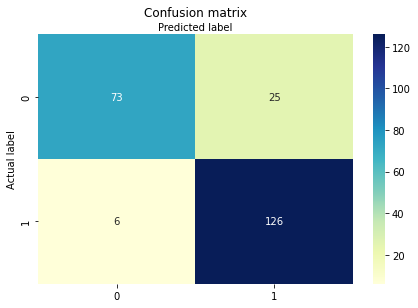

In [ ]:
from sklearn.metrics import plot_confusion_matrix
y_pred = voting_clf.predict_proba(X_test)[:, 1] > 0.2
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
import joblib
print(classification_report(y_test, y_pred))
joblib.dump(voting_clf, 'model.pkl', compress = 1)
joblib.dump(full_pipeline, 'pipeline.pkl', compress = 1)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        98
           1       0.83      0.95      0.89       132

    accuracy                           0.87       230
   macro avg       0.88      0.85      0.86       230
weighted avg       0.87      0.87      0.86       230



['pipeline.pkl']

In [ ]:
voting_clf.predict(X_test)

joblib.dump(voting_clf, 'model.pkl', compress = 1)

['model.pkl']

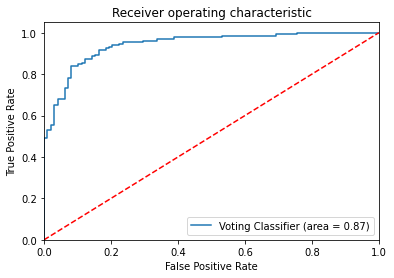

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
voting_clf_roc_auc = roc_auc_score(y_test, voting_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Voting Classifier (area = %0.2f)' % voting_clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()